In [1]:
from ect.optimization import ECTFullOptimizer, snr, l1dist
from ect.helpers import Mode, MultimodalGenerator, SingleImageGenerator
from matplotlib import pyplot as plt

In [2]:
fnf = [1.3347, -0.1276, 0.7737, 0.4291, 0.8655, 0.9544, 0.9387, 0.9636, 0.9533, 0.9668, 0.9320, 0.9144, 0.9395, 0.9503, 0.9899, 0.9316, 0.9708, 0.8407, 1.0149, 0.2355]
snf = [1.6175, 1.7390, 1.9404, 2.1780, 2.2013, 2.2393, 2.2169, 2.2180, 2.1818, 2.0851, 2.1757, 2.1821, 2.2178, 2.1828, 2.2628, 2.1157, 2.3304, 2.0736, 2.2568, 1.1056]

In [3]:
mode = [Mode(100, 45), Mode(100, -45)]
# mode = [Mode(10, 0, .2), Mode(15, 30, .4), Mode(25, 60, .6), Mode(35, 90, .8), Mode(50, 45, 1)] 
# mode = [Mode(20*x, 90-9*x, 1) for x in range(1,20)]
# mode = [Mode(100/x, 9*x, 1) for x in range(1, 20)]
gen = MultimodalGenerator(mode, offset=5)
# gen = SingleImageGenerator("./images/sailboat.jpg", offset=0)
# gen = RandUnimodalGenerator(offset=5, iterlen=3)
opt = ECTFullOptimizer(gen, snr, offset=5, ect_offset=0, n_knots=20)

2024-06-13 19:48:58.226 | DEBUG    | ect.maps.logpolar_new:logpolar:50 - Running logpolar transform in offset mode offset=5.0
2024-06-13 19:48:58.228 | DEBUG    | ect.maps.logpolar_new:logpolar:62 - Applying bilinear pixel mapping


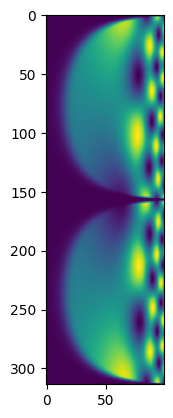

In [4]:
plt.imshow(gen.generate())

In [5]:
r = opt.optim(method="Nelder-Mead", options={"adaptive":True, "maxiter":1e7}, fnf=fnf, snf=snf)

# r = opt.optim(fnf=fnf, snf=snf, tol=1e-3)

# import json
# print(json.dumps(r))

Current loss=-13.035
Current loss=-13.035
Current loss=-13.035
Current loss=-13.035
Current loss=-13.035
Current loss=-13.035
Current loss=-13.035
Current loss=-13.035
Current loss=-13.035
Current loss=-13.035
Current loss=-13.035
Current loss=-13.035
Current loss=-13.035
Current loss=-13.035
Current loss=-13.035
Current loss=-13.035
Current loss=-13.035
Current loss=-13.035
Current loss=-13.035
Current loss=-13.035
Current loss=-13.035
Current loss=-13.035
Current loss=-13.035
Current loss=-13.035
Current loss=-13.035
Current loss=-13.035
Current loss=-13.035
Current loss=-13.035
Current loss=-13.035
Current loss=-13.035
Current loss=-13.035
Current loss=-13.035
Current loss=-13.054
Current loss=-13.074
Current loss=-13.088
Current loss=-13.088
Current loss=-13.128
Current loss=-13.145
Current loss=-13.166
Current loss=-13.166
Current loss=-13.166
Current loss=-13.166
Current loss=-13.166
Current loss=-13.213
Current loss=-13.411
Current loss=-13.411
Current loss=-13.411
Current loss=

In [ ]:
r

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: -22.415028952536978225
        x: [ 1.335e+00 -1.276e-01 ...  6.760e-01  1.212e-01]
      nit: 155
      jac: [ 2.299e-02  5.716e-02 ...  3.163e+01 -1.595e+00]
 hess_inv: [[ 1.587e-01 -1.239e-02 ...  5.894e-04 -9.098e-04]
            [-1.239e-02  1.052e-01 ... -1.425e-03 -9.871e-04]
            ...
            [ 5.894e-04 -1.425e-03 ...  1.814e-04  6.211e-05]
            [-9.098e-04 -9.871e-04 ...  6.211e-05  2.175e-04]]
     nfev: 13858
     njev: 322

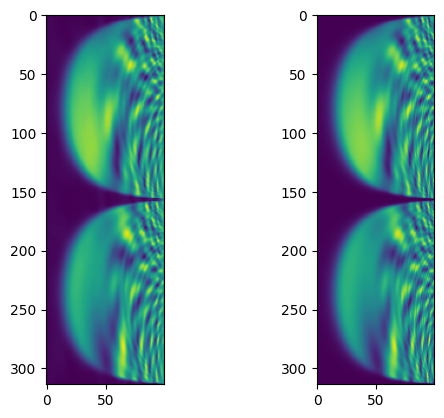

In [ ]:
plt.subplot(1,2,1)
plt.imshow(opt.inv)

plt.subplot(1,2,2)
plt.imshow(opt.image.generate())

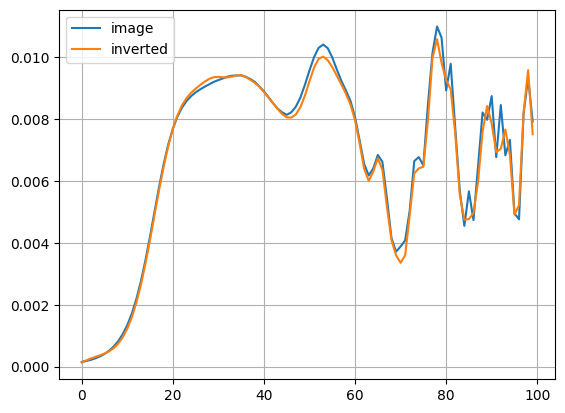

In [ ]:
import cv2
P, _ = opt.image.generate().shape
inorm = cv2.normalize(opt.image.generate(), None, 1, 0, cv2.NORM_L2)
invnorm = cv2.normalize(opt.inv, None, 1, 0, cv2.NORM_L2)

plt.plot(inorm[78, :])
plt.plot(invnorm[78, :])
plt.legend(["image", "inverted"])
plt.grid()

from ect.optimization import snr
from icecream import ic
# ic(snr(inorm, invnorm))

In [ ]:
old_fnf = [3.183, -2.054, 1.522, 0.821, 1.511, 0.907, 1.114, 0.934, 1.085, 1.063, 0.979, 1.051, 0.941, 1.005, 0.983, 0.978, 1.079, 1.027, 0.818, 0.608]

fnf = r["x"][:20]
print(f"[{', '.join(f'{x:.3f}' for x, y in zip(fnf, old_fnf))}]")

[1.335, -0.128, 0.774, 0.429, 0.866, 0.954, 0.939, 0.964, 0.953, 0.967, 0.932, 0.914, 0.939, 0.950, 0.990, 0.932, 0.971, 0.841, 1.015, 0.235]


In [ ]:
old_snf = [1.747, 1.743, 1.731, 1.724, 1.708, 1.710, 1.728, 1.723, 1.752, 1.749, 1.762, 1.862, 1.888, 1.894, 1.850, 1.861, 1.720, 1.650, 1.578, 1.202]


snf = r["x"][20:40]
print(f"[{', '.join(f'{x:.3f}' for x,y in zip(old_snf, snf))}]")

[1.747, 1.743, 1.731, 1.724, 1.708, 1.710, 1.728, 1.723, 1.752, 1.749, 1.762, 1.862, 1.888, 1.894, 1.850, 1.861, 1.720, 1.650, 1.578, 1.202]


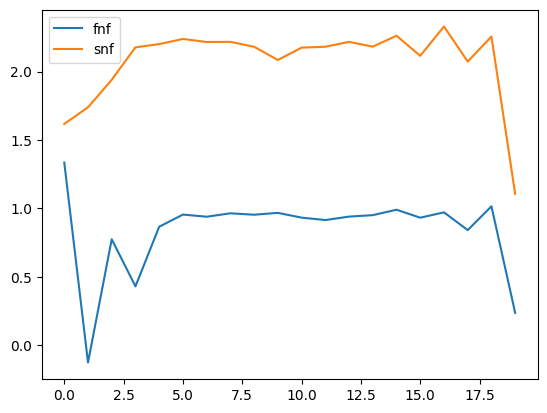

In [ ]:
plt.plot(fnf)
plt.plot(snf)
plt.legend(["fnf", "snf"])

In [ ]:
list(fnf)

[1.3346951279515493,
 -0.12760453083131468,
 0.7737367810804945,
 0.42912536925463873,
 0.8655425604755949,
 0.9544087915293833,
 0.9386920933875496,
 0.9636445009144003,
 0.9533073623107684,
 0.9668279727478232,
 0.9320202715843314,
 0.9143711397746781,
 0.9394911574114748,
 0.950283460032911,
 0.9898950683804175,
 0.9315779548745562,
 0.9707737976898635,
 0.840727754972115,
 1.014864030538079,
 0.23547675771843576]

In [ ]:
print(f"[{', '.join(f'{x:.4f}' for x in fnf)}]")
print(f"[{', '.join(f'{x:.4f}' for x in snf)}]")

[1.3347, -0.1276, 0.7737, 0.4291, 0.8655, 0.9544, 0.9387, 0.9636, 0.9533, 0.9668, 0.9320, 0.9144, 0.9395, 0.9503, 0.9899, 0.9316, 0.9708, 0.8407, 1.0149, 0.2355]
[1.6175, 1.7390, 1.9404, 2.1780, 2.2013, 2.2393, 2.2169, 2.2180, 2.1818, 2.0851, 2.1757, 2.1821, 2.2178, 2.1828, 2.2628, 2.1157, 2.3304, 2.0736, 2.2568, 1.1056]
